In [132]:
!pip install --index-url https://test.pypi.org/simple/ --no-deps starrydata==0.0.14
!pip install tqdm pandas requests matplotlib seaborn numpy bokeh

Looking in indexes: https://test.pypi.org/simple/
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 18.5 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 92.5 MB/s eta 0:00:00ta 0:00:01
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 27.8 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-6.0.1-pp39-pypy39_pp73-macosx_10_9_arm64.whl size=45374 sha256=ae1d3b0c06de472bc5d3e2aeaaeecf844e34819fcda599e5bda4c50050e03fb6
  Stored in directory: /Users/matotomoya/Library/Caches/pip/wheels/1e/56/e9/7800f1d7e0d97c8ccde3cb

In [12]:
from starrydata.dataset import Dataset

In [13]:
dataset = Dataset(date="20240515")

2024-05-15 18:07:45,044 - INFO - Starting the download of the ZIP file.
2024-05-15 18:07:45,045 - INFO - Fetching dataset information.
2024-05-15 18:07:45,049 - INFO - No specific date provided. Fetching the latest dataset.
2024-05-15 18:07:47,380 - INFO - Found latest dataset: 20240515_starrydata2
2024-05-15 18:07:48,551 - INFO - Downloading file: all_dataset_240515-0000.zip
2024-05-15 18:07:50,376 - WARNING - SSL verification failed, retrying without verification.
/Users/matotomoya/dev/starrydata-notebook/.venv/lib/pypy3.9/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'proxyout.nims.go.jp'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/Users/matotomoya/dev/starrydata-notebook/.venv/lib/pypy3.9/site-packages/urllib3/connectionpool.py:1103: InsecureRequestWarning: Unverified HTTPS request is being made to host 'pr

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv(dataset.all_curves)

In [16]:
# キャリア濃度と電気伝導度に関連するデータを抽出
carrier_concentration_data = df[(df['prop_y'] == 'Carrier concentration') & (df['prop_x'] == 'Temperature')]
electrical_conductivity_data = df[(df['prop_y'] == 'Electrical conductivity') & (df['prop_x'] == 'Temperature')]



In [17]:
print(carrier_concentration_data.shape)
print(electrical_conductivity_data.shape)

(1804, 15)
(16902, 15)


In [18]:
# 'x' と 'y' の列をリストに変換し、数値に変換
carrier_concentration_data['x'] = carrier_concentration_data['x'].apply(eval).apply(lambda lst: [float(i) for i in lst])
carrier_concentration_data['y'] = carrier_concentration_data['y'].apply(eval).apply(lambda lst: [float(i) for i in lst])
electrical_conductivity_data['x'] = electrical_conductivity_data['x'].apply(eval).apply(lambda lst: [float(i) for i in lst])
electrical_conductivity_data['y'] = electrical_conductivity_data['y'].apply(eval).apply(lambda lst: [float(i) for i in lst])

/var/folders/mq/v_d4txj55v5bdfj_fxd5678c0000gn/T/ipykernel_17175/796615678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carrier_concentration_data['x'] = carrier_concentration_data['x'].apply(eval).apply(lambda lst: [float(i) for i in lst])
/var/folders/mq/v_d4txj55v5bdfj_fxd5678c0000gn/T/ipykernel_17175/796615678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carrier_concentration_data['y'] = carrier_concentration_data['y'].apply(eval).apply(lambda lst: [float(i) for i in lst])
/var/folders/mq/

In [19]:
carrier_concentration_data.head()

,SID,DOI,composition,sample_id,figure_id,prop_x,prop_y,unit_x,unit_y,x,y,created_at,updated_at,project_names,comments
2922,779,10.1039/c3dt53487a,Sr5Al2Sb6,1329,771,Temperature,Carrier concentration,K,m^(-3),"[451.0, 485.0, 510.0, 510.0, 524.0, 531.0, 538...","[-1.8e+24, -2.36e+24, 3.24e+24, -4.59e+24, -1....",Thu Jan 18 2018 21:50:34 GMT+0900 (JST),Thu Jan 18 2018 21:50:34 GMT+0900 (JST),"[""ThermoelectricMaterials""]",NaN
2923,779,10.1039/c3dt53487a,Sr5Al2Sb6,1330,771,Temperature,Carrier concentration,K,m^(-3),"[451.0, 474.0, 508.0, 556.0, 611.0, 659.0, 691...","[1.5e+25, 1.55e+25, 1.55e+25, 1.67e+25, 2.06e+...",Thu Jan 18 2018 21:50:34 GMT+0900 (JST),Thu Jan 18 2018 21:50:34 GMT+0900 (JST),"[""ThermoelectricMaterials""]",NaN
2924,779,10.1039/c3dt53487a,Sr5Al1.95Zn0.05Sb6,1331,771,Temperature,Carrier concentration,K,m^(-3),"[325.0, 378.0, 419.0, 465.0, 515.0, 563.0, 620...","[1.95e+25, 1.95e+25, 2.17e+25, 2.28e+25, 2.73e...",Thu Jan 18 2018 21:50:34 GMT+0900 (JST),Thu Jan 18 2018 21:50:34 GMT+0900 (JST),"[""ThermoelectricMaterials""]",NaN
16523,116,10.1002/aenm.201300174,Mg2.08Si0.45Sn0.537Sb0.013,5349,4056,Temperature,Carrier concentration,K,m^(-3),"[300.7428, 321.1435, 348.3444, 363.1812, 394.0...","[2.558966e+25, 2.558966e+25, 2.612273e+25, 2.6...",Tue Jul 17 2018 15:48:56 GMT+0900 (JST),Tue Jul 17 2018 15:48:56 GMT+0900 (JST),"[""ThermoelectricMaterials""]",NaN
16524,116,10.1002/aenm.201300174,Mg2.12Si0.45Sn0.537Sb0.013,5350,4056,Temperature,Carrier concentration,K,m^(-3),"[297.6518, 317.4343, 344.6352, 368.1269, 389.1...","[4.221167e+25, 4.221167e+25, 4.279319e+25, 4.2...",Tue Jul 17 2018 15:52:54 GMT+0900 (JST),Tue Jul 17 2018 15:54:21 GMT+0900 (JST),"[""ThermoelectricMaterials""]",NaN


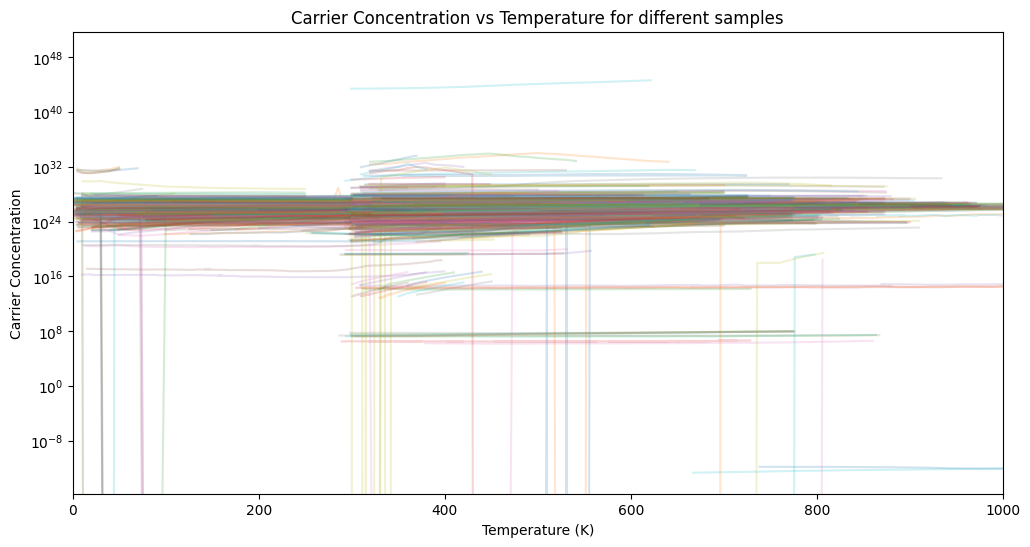

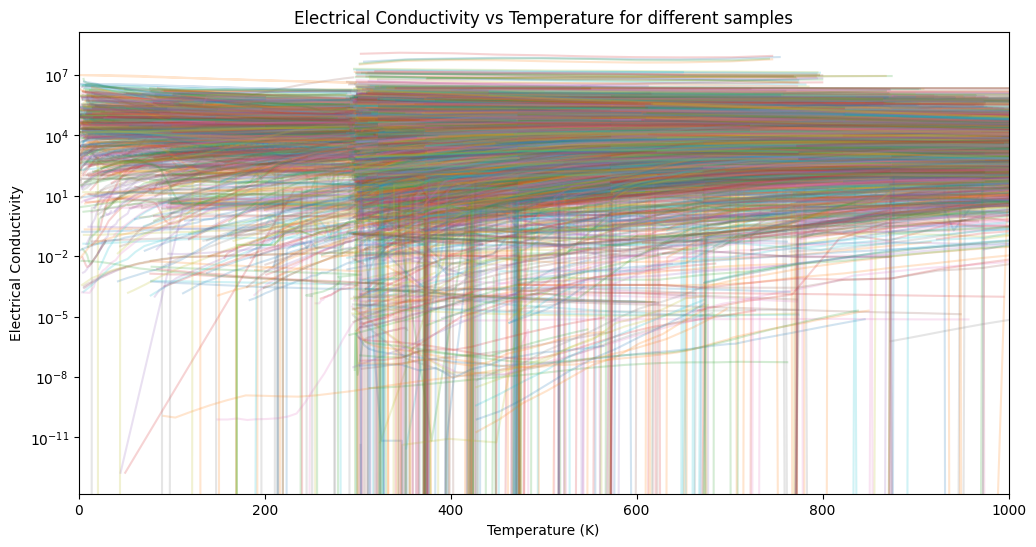

In [119]:
# キャリア濃度データのプロット
plt.figure(figsize=(12, 6))
plt.yscale('log')
for sample_id in carrier_concentration_data['sample_id'].unique():
    sample_data = carrier_concentration_data[carrier_concentration_data['sample_id'] == sample_id]
    for x, y in zip(sample_data['x'], sample_data['y']):
        plt.plot(x, y, label=f'Sample ID {sample_id}', alpha=0.2)
plt.xlim(0,1000)
plt.xlabel('Temperature (K)')
plt.ylabel('Carrier Concentration')
plt.title('Carrier Concentration vs Temperature for different samples')
plt.show()

# 電気伝導度データのプロット
plt.figure(figsize=(12, 6))
plt.yscale('log')
plt.xlim(0,1000)
for sample_id in electrical_conductivity_data['sample_id'].unique():
    sample_data = electrical_conductivity_data[electrical_conductivity_data['sample_id'] == sample_id]
    for x, y in zip(sample_data['x'], sample_data['y']):
        plt.plot(x, y, label=f'Sample ID {sample_id}', alpha=0.2)
plt.xlabel('Temperature (K)')
plt.ylabel('Electrical Conductivity')
plt.title('Electrical Conductivity vs Temperature for different samples')
plt.show()

In [24]:
# 近似曲線を作成し、50度おきの値を取得する関数
def linear_interpolation(x, y, new_x):
    new_y = np.interp(new_x, x, y)
    return new_y

In [97]:
# 温度範囲とステップ設定
temp_min = 300
temp_max = 900
temp_step = 50
new_temperatures = np.arange(temp_min, temp_max + temp_step, temp_step)


In [98]:
# 各試料ごとにデータを処理
merged_data = []

for sample_id in carrier_concentration_data['sample_id'].unique():
    carrier_sample = carrier_concentration_data[carrier_concentration_data['sample_id'] == sample_id]
    conductivity_sample = electrical_conductivity_data[electrical_conductivity_data['sample_id'] == sample_id]

    # データが空でないことを確認
    if len(carrier_sample) > 0 and len(conductivity_sample) > 0:
        carrier_x = carrier_sample['x'].values[0]
        carrier_y = carrier_sample['y'].values[0]
        conductivity_x = conductivity_sample['x'].values[0]
        conductivity_y = conductivity_sample['y'].values[0]

        if len(carrier_x) > 1 and len(carrier_y) > 1 and len(conductivity_x) > 1 and len(conductivity_y) > 1:
            # 近似曲線を作成
            carrier_interp = linear_interpolation(carrier_x, carrier_y, new_temperatures)
            conductivity_interp = linear_interpolation(conductivity_x, conductivity_y, new_temperatures)

            # データフレームにまとめる
            temp_df = pd.DataFrame({
                'temperature': new_temperatures,
                'carrier_concentration': carrier_interp,
                'electrical_conductivity': conductivity_interp
            })
            temp_df['sample_id'] = sample_id

            merged_data.append(temp_df)


In [99]:
merged_data

[    temperature  carrier_concentration  electrical_conductivity  sample_id
 0           300           2.558966e+25             14998.280000       5349
 1           350           2.618221e+25             15129.489439       5349
 2           400           2.642243e+25             14969.009573       5349
 3           450           2.741078e+25             14640.613956       5349
 4           500           2.944766e+25             14329.546545       5349
 5           550           3.266642e+25             14288.866994       5349
 6           600           3.752248e+25             14500.291970       5349
 7           650           4.448213e+25             15224.750095       5349
 8           700           5.422679e+25             16238.141688       5349
 9           750           5.662264e+25             16425.320000       5349
 10          800           5.662264e+25             16425.320000       5349
 11          850           5.662264e+25             16425.320000       5349
 12         

In [100]:
# すべての試料データを結合
merged_df = pd.concat(merged_data, ignore_index=True)

# NaN値を含む行を削除
merged_df.dropna(inplace=True)

In [101]:
merged_df

,temperature,carrier_concentration,electrical_conductivity,sample_id
0,300,2.558966e+25,14998.280000,5349
1,350,2.618221e+25,15129.489439,5349
2,400,2.642243e+25,14969.009573,5349
3,450,2.741078e+25,14640.613956,5349
4,500,2.944766e+25,14329.546545,5349
...,...,...,...,...
8536,700,1.362847e+25,212109.400000,46483
8537,750,1.362847e+25,212109.400000,46483
8538,800,1.362847e+25,212109.400000,46483
8539,850,1.362847e+25,212109.400000,46483


In [124]:
merged_df['sample_id'].unique().size

630

In [129]:
sample_df = pd.read_csv(dataset.all_samples)

In [130]:
sample_df.head()

,sample_name,sample_id,composition,SID,DOI,sample_info
0,Pb1Te1I0.0006,1,Pb1Te1I0.0006,4419,10.1016/j.physb.2005.03.022,NaN
1,Pb1Te0.9945I0.0055,2,Pb1Te0.9945I0.0055,860,10.1039/c1ee01314a,"{""LaserFlash"":{""category"":"""",""comment"":""""},""Fo..."
2,In0.01Ag0.01Sn0.98Te1,3,In0.01Ag0.01Sn0.98Te1,6963,10.1063/1.4959845,NaN
3,Pb1.001Te1I0.002,4,Pb1.001Te1I0.002,4419,10.1016/j.physb.2005.03.022,NaN
4,Pb1Te0.9988I0.0012,5,Pb1Te0.9988I0.0012,860,10.1039/c1ee01314a,"{""LaserFlash"":{""category"":"""",""comment"":""""},""Fo..."


In [131]:
sample_df[sample_df['sample_id']== 5349]

,sample_name,sample_id,composition,SID,DOI,sample_info
5218,x=0.04,5349,Mg2.08Si0.45Sn0.537Sb0.013,116,10.1002/aenm.201300174,"{""Form"":{""category"":""Bulk"",""comment"":""""},""Fabr..."


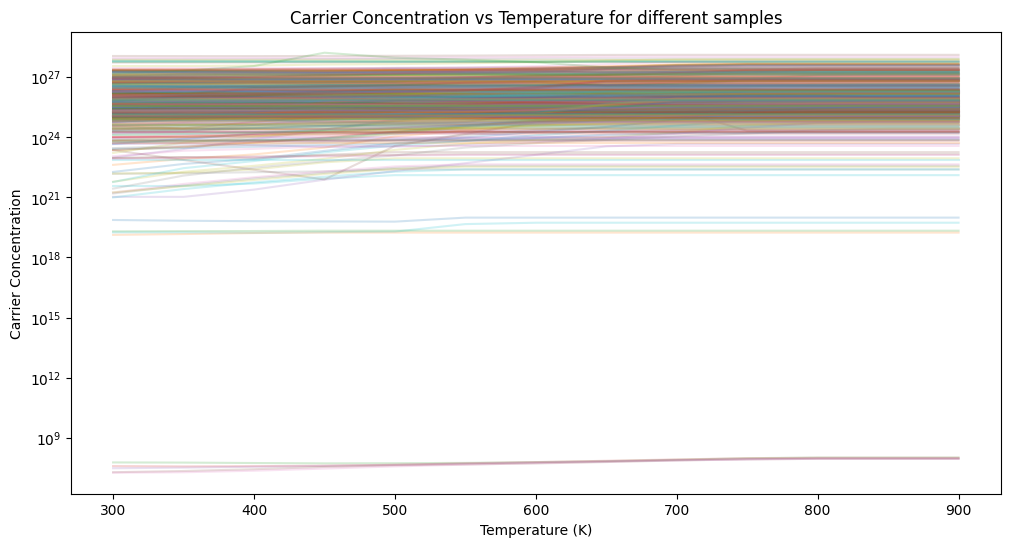

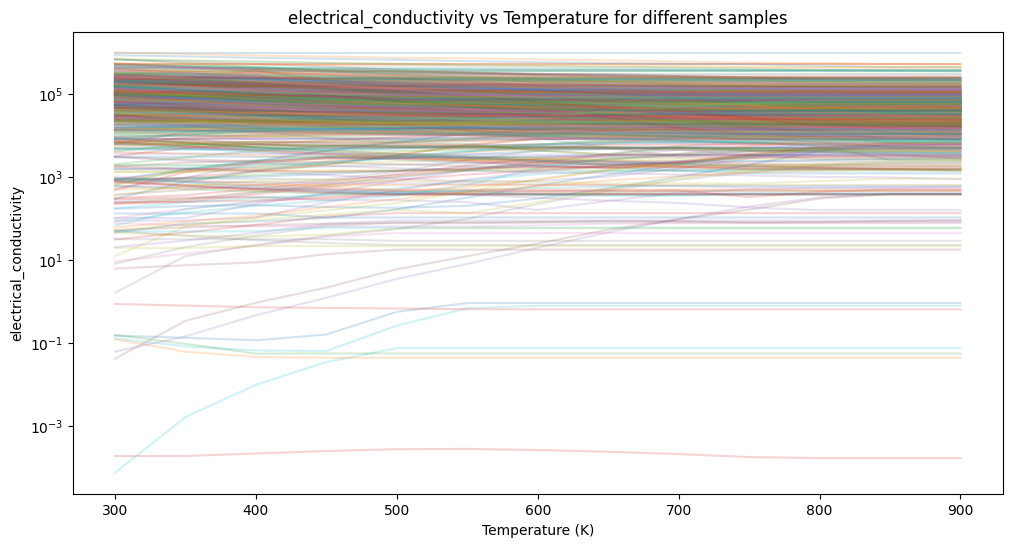

In [112]:
# キャリア濃度データのプロット
plt.figure(figsize=(12, 6))
plt.yscale('log')
for sample_id in merged_df['sample_id'].unique():
    sample_data = merged_df[merged_df['sample_id'] == sample_id]
    plt.plot(sample_data['temperature'], sample_data['carrier_concentration'], label=f'Sample ID {sample_id}', alpha=0.2)
plt.xlabel('Temperature (K)')
plt.ylabel('Carrier Concentration')
plt.title('Carrier Concentration vs Temperature for different samples')
plt.show()

plt.figure(figsize=(12, 6))
plt.yscale('log')
for sample_id in merged_df['sample_id'].unique():
    sample_data = merged_df[merged_df['sample_id'] == sample_id]
    plt.plot(sample_data['temperature'], sample_data['electrical_conductivity'], label=f'Sample ID {sample_id}', alpha=0.2)
plt.xlabel('Temperature (K)')
plt.ylabel('electrical_conductivity')
plt.title('electrical_conductivity vs Temperature for different samples')
plt.show()



2024-05-15 18:56:28,295 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


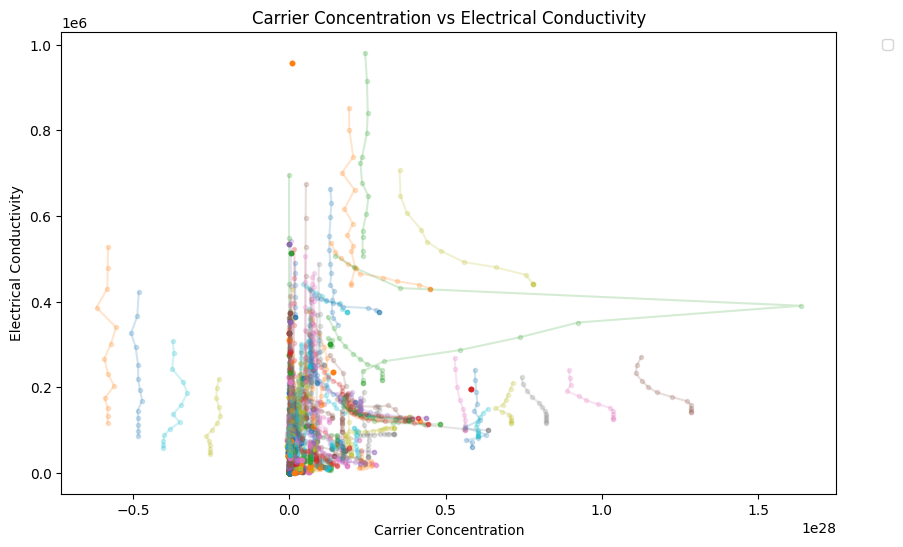

In [103]:
# 各試料のデータを線でつなぐプロット
plt.figure(figsize=(10, 6))
for sample_id in merged_df['sample_id'].unique():
    sample_data = merged_df[merged_df['sample_id'] == sample_id]
    plt.plot(sample_data['carrier_concentration'], sample_data['electrical_conductivity'], marker='.', alpha=0.2)

plt.xlabel('Carrier Concentration')
plt.ylabel('Electrical Conductivity')
plt.title('Carrier Concentration vs Electrical Conductivity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [104]:
# 相関係数の計算
correlation = merged_df[['carrier_concentration', 'electrical_conductivity']].corr().iloc[0, 1]
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.20704870073346235


In [105]:
# 負のキャリア濃度を持つ行を削除
merged_df = merged_df[merged_df['carrier_concentration'] >= 0]

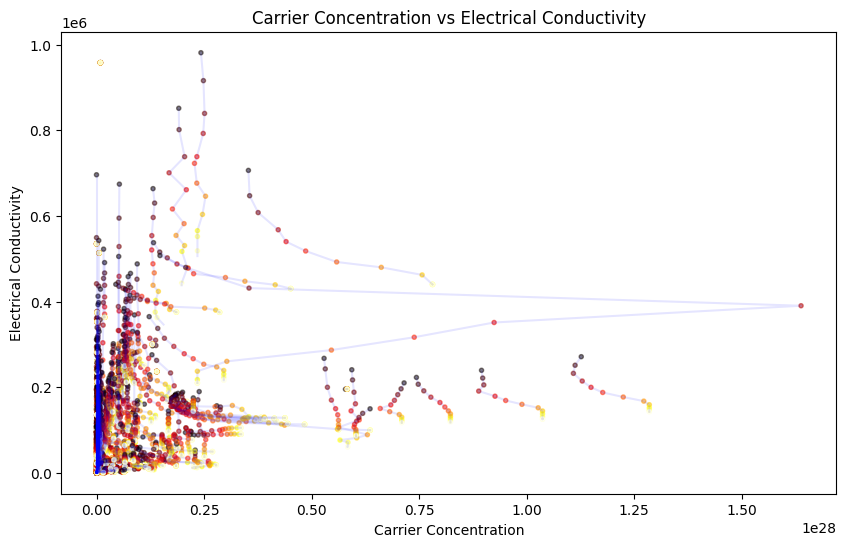

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for sample_id in merged_df['sample_id'].unique():
    sample_data = merged_df[merged_df['sample_id'] == sample_id]
    # 線をプロット
    plt.plot(sample_data['carrier_concentration'], sample_data['electrical_conductivity'], alpha=0.1, color="blue")

    # 点をプロット
    plt.scatter(sample_data['carrier_concentration'], sample_data['electrical_conductivity'], c=sample_data['temperature'], cmap='hot', alpha=0.5, marker=".")

# カラーバーの設定（必要に応じてコメントアウトを解除）
# cbar = plt.colorbar(sm)
# cbar.set_label('Temperature (K)')
plt.xlabel('Carrier Concentration')
plt.ylabel('Electrical Conductivity')
plt.title('Carrier Concentration vs Electrical Conductivity')
plt.show()


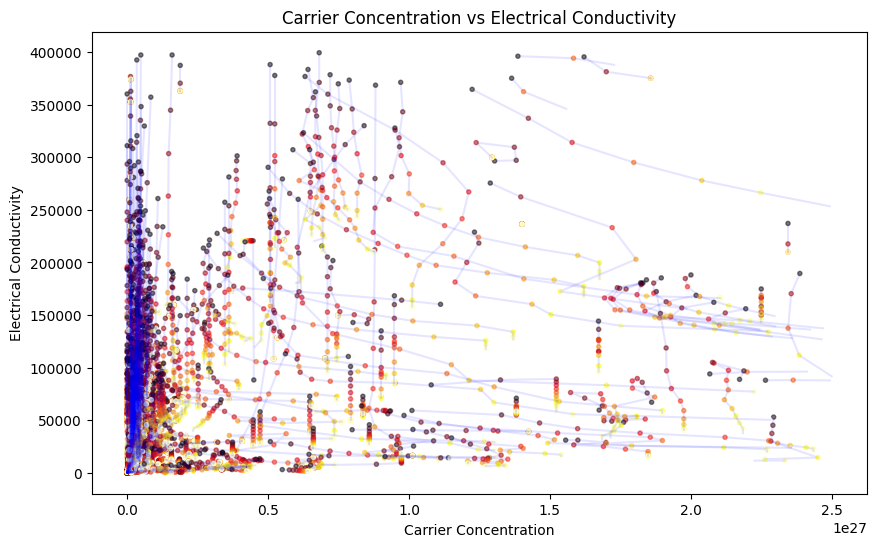

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for sample_id in merged_df['sample_id'].unique():
    sample_data = merged_df[merged_df['sample_id'] == sample_id]
    # データをフィルタリング
    filtered_data = sample_data[(sample_data['carrier_concentration'] <= 0.25 * 1e28) & (sample_data['electrical_conductivity'] <= 0.4 * 1e6)]

    # 線をプロット
    plt.plot(filtered_data['carrier_concentration'], filtered_data['electrical_conductivity'], alpha=0.1, color="blue")
    # 点をプロット
    plt.scatter(filtered_data['carrier_concentration'], filtered_data['electrical_conductivity'], c=filtered_data['temperature'], cmap='hot', alpha=0.5, marker=".")

# カラーバーの設定（必要に応じてコメントアウトを解除）
# cbar = plt.colorbar(sm)
# cbar.set_label('Temperature (K)')
plt.xlabel('Carrier Concentration')
plt.ylabel('Electrical Conductivity')
plt.title('Carrier Concentration vs Electrical Conductivity')
plt.show()


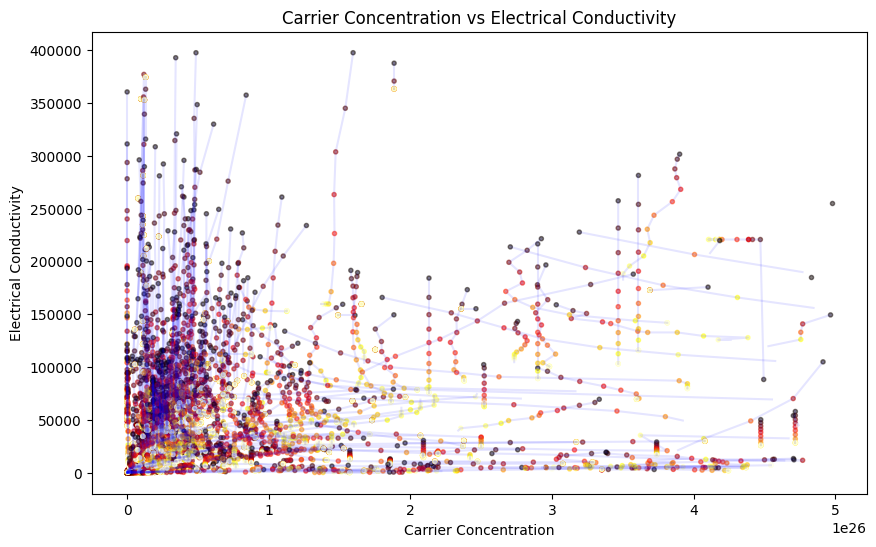

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for sample_id in merged_df['sample_id'].unique():
    sample_data = merged_df[merged_df['sample_id'] == sample_id]
    # データをフィルタリング
    filtered_data = sample_data[(sample_data['carrier_concentration'] <= 0.5 * 1e27) & (sample_data['electrical_conductivity'] <= 0.4 * 1e6)]

    # 線をプロット
    plt.plot(filtered_data['carrier_concentration'], filtered_data['electrical_conductivity'], alpha=0.1, color="blue")
    # 点をプロット
    plt.scatter(filtered_data['carrier_concentration'], filtered_data['electrical_conductivity'], c=filtered_data['temperature'], cmap='hot', alpha=0.5, marker=".")

# カラーバーの設定（必要に応じてコメントアウトを解除）
# cbar = plt.colorbar(sm)
# cbar.set_label('Temperature (K)')
plt.xlabel('Carrier Concentration')
plt.ylabel('Electrical Conductivity')
plt.title('Carrier Concentration vs Electrical Conductivity')
plt.show()


In [109]:
# 相関係数の計算
correlation = merged_df[['carrier_concentration', 'electrical_conductivity']].corr().iloc[0, 1]
print(f'Correlation coefficient: {correlation}')

Correlation coefficient: 0.2660769318462344
